In [1]:
#CARREGA A(S) BIBLIOTECAS
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#CARREGA O ARQUIVO QUE CONTEM A LOCALIZAÇÃO DAS PLANTAS DE PRODUCAO DE ÓLEO LUBRIFICANTE EM SOLO BRASILEIRO
plantas_producao = pd.read_excel("../data/boletim_1/Anexo_E.xlsx", sheetname="30-Mapa_Planta_Prod_OLAC")
plantas_producao.head()

,CNPJ,Produtor,Município,UF
0,57941890000153,AGECOM PRODUTOS DE PETRÓLEO LTDA.,MAUA,SP
1,3439153000128,BIOLUB QUÍMICA LTDA -ME,SOROCABA,SP
2,33194978000190,CASTROL BRASIL LTDA,RIO DE JANEIRO,RJ
3,45036670000104,CHEMLUB PRODUTOS QUÍMICOS LTDA,VALINHOS,SP
4,5524572001084,CHEVRON BRASIL LUBRIFICANTES LTDA.,DUQUE DE CAXIAS,RJ


In [3]:
#CRIA UM DICIONÁRIO PARA ARMAZENAR O UF DAS PLANTAS DE PRODUCAO
empresa_prod_uf = {}

for index,row in plantas_producao.iterrows():
    empresa = row['Produtor']
    if empresa not in empresa_prod_uf:
        empresa_prod_uf[empresa] = row['UF']
    else:
    #CASO UMA EMPRESA TENHA MAIS DE UMA PLANTA INDUSTRIAL, IMPRIMIR O NOME DA EMPRESA E A UF ONDE A PLANTA ESTÁ.    
        print(empresa+" - "+row['UF']) # A IPIRANGA NESSE CASO POSSUI DUAS PLANTAS NO MESMO ESTADO (RJ)
        continue

IPIRANGA PRODUTOS DE PETRÓLEO S.A - RJ


In [4]:
#VENDAS NACIONAIS DE OLAC PELOS PRODUTORES E IMPORTADORES
#A COLUNA PRODUTOR-IMPORTADOR POSSUI A INFORMAÇÃÕ DE UMA EMPRESA QUE DECLARA UMA OPERAÇÃO DE COMERCIALIZAÇÃO À ANP.
#TODAVIA, ESSE PRODUTO COMERCIALIZADO PODE TER A SEGUINTE ORIGEM:
### 1. SER PRODUZIDO EM PLANTA INDUSTRIAL PRÓPRIA EM SOLO BRASILEIRO.
### 2. SER PRODUZIDO EM PLANTA INDUSTRIAL DE TERCEIRO EM SOLO BRASILEIRO.
### 3. SER PRODUZID FORA DO BRASIL (PLANTA PRÓPRIA OU NÃO.)
vendas = pd.read_excel("../data/boletim_1/Anexo_H.xlsx", sheetname="41-Vendas OLAC Geral")
vendas.head(5)

,Data,Cód Regulado ANP,Produtor-Importador,Código do Produto,Descrição do Produto,Região do Destinatário,UF do Destinatário,Volume-Litros
0,12/2016,200296,TG Indústria e Comércio de Lubrificantes e Gra...,620101002,ENGRENAGENS E SISTEMAS CIRCULATÓRIOS,SUL,PR,9828
1,12/2016,200296,TG Indústria e Comércio de Lubrificantes e Gra...,620101002,ENGRENAGENS E SISTEMAS CIRCULATÓRIOS,SUL,SC,800
2,12/2016,200296,TG Indústria e Comércio de Lubrificantes e Gra...,620501001,Ciclo Otto,SUL,PR,3685
3,12/2016,200296,TG Indústria e Comércio de Lubrificantes e Gra...,620501001,Ciclo Otto,SUL,RS,480
4,12/2016,200296,TG Indústria e Comércio de Lubrificantes e Gra...,620501001,Ciclo Otto,SUL,SC,5040


In [5]:
vendas['Produtor-Importador'].unique()

array(['TG Indústria e Comércio de Lubrificantes e Graxas Ltda. - EPP',
       'CADIUM COMÉRCIO IMPORTAÇÃO E EXPORTAÇÃO LTDA',
       'FALUB INDÚSTRIA E COMÉRCIO DE LUBRIFICANTES LTDA.',
       'LUMA OIL INDÚSTRIA E COMÉRCIO LTDA',
       'TECLUB INDÚSTRIA E COMÉRCIO DE LUBRIFICANTES LTDA.',
       'QUAKER CHEMICAL INDÚSTRIA E COMÉRCIO S.A',
       'REGELUB LUBRIFICANTES LTDA', 'KELPEN OIL BRASIL LTDA',
       'UPS INTERNACIONAL INDÚSTRIA LTDA.',
       'KATION RAIDEN DO BRASIL LTDA.',
       "LUBRI-MOTOR'S INDÚSTRIA, COMÉRCIO, IMPORTAÇÃO E EXPORTAÇÃO LTDA",
       'BIOLUB QUÍMICA LTDA -ME', 'EVOLUB EVOLUÇÃO LUBRIFICANTES LTDA.',
       'PETRONAS LUBRIFICANTES S.A.',
       'SAFRA QUÍMICA INDÚSTRIA E COMÉRCIO DE LUBRIFICANTES LTDA',
       'INCOL-LUB INDÚSTRIA E COMÉRCIO LTDA',
       'SR III INDÚSTRIA E COMÉRCIO DE LUBRIFICANTES LTDA',
       'TEXSA DO BRASIL LTDA', 'DUNAX LUBRIFICANTES LTDA. - ME',
       'ULTRAX LUBRIFICANTES LTDA - EPP',
       'FÁBRICA-QUÍMICA PETRÓLEO E DERIVADOS

In [6]:
#ALTERAR A ENTRADA
vendas.loc[vendas['Produtor-Importador'] == 'SHELL BRASIL PETRÓLEO LTDA.10456016000167', 'Produtor-Importador'] = 'SHELL BRASIL PETRÓLEO LTDA.'
vendas.loc[vendas['Produtor-Importador'] == 'KLEBER MARQUES NEVES 17639821819', 'Produtor-Importador'] = 'KLEBER MARQUES NEVES'

In [7]:
vendas.shape

(37677, 8)

In [8]:
#CRIAR UMA CÓPIA DE DATAFRAME PARA MODIFICAR
vendas_original = vendas.copy()

In [9]:
categoria = vendas_original.groupby('Descrição do Produto')['Volume-Litros'].sum()

In [10]:
#VOLUME TOTAL (L) COMERCIALIZADO DE OLAC NO ANO DE 2016
total_vendas = vendas_original['Volume-Litros'].sum()
total_vendas

1229692383

In [11]:
#VOLUMES TOTAIS (L) DE COMERCIALIZAÇÃO POR CATEGORIA DE LUBRIFICANTE
categoria

Descrição do Produto
Ciclo Diesel                            306974521
Ciclo Otto                              375935694
ENGRENAGENS E SISTEMAS CIRCULATÓRIOS     48723674
Isolante Tipo A                          15366764
Isolante Tipo B                           1878221
Motores 2 tempos                         12330710
Outros Óleos Lubrificantes Acabados     164282421
TRANSMISSÕES E SISTEMAS HIDRÁULICOS     270903530
Óleos Lubrificantes Ferroviários         13367169
Óleos Lubrificantes Marítimos            18657892
Óleos Lubrificantes para Aviação          1271787
Name: Volume-Litros, dtype: int64

In [12]:
#DATAFRAME COM OS VOLUMES (LITROS) DE COMERCIALIZAÇÃO POR CATEGORIA DE OLAC
volume_categoria_litros = pd.DataFrame(categoria)
volume_categoria_litros

,Volume-Litros
Descrição do Produto,
Ciclo Diesel,306974521
Ciclo Otto,375935694
ENGRENAGENS E SISTEMAS CIRCULATÓRIOS,48723674
Isolante Tipo A,15366764
Isolante Tipo B,1878221
Motores 2 tempos,12330710
Outros Óleos Lubrificantes Acabados,164282421
TRANSMISSÕES E SISTEMAS HIDRÁULICOS,270903530
Óleos Lubrificantes Ferroviários,13367169


In [13]:
#CARREGA OS DADOS DE PRODUÇÃO DO ANO DE 2016
dado_producao = pd.read_excel("../data/Boletim_1/Anexo_G-Producao_nacional_de_OLAC.xlsx", sheetname="71-Producao OLAC Geral")
dado_producao.head()

,Data,Código do Produto,Descrição do Produto,Região do Produtor,UF do Produtor,Descrição da Operação,Volume-Litros
0,12/2016,620101002,ENGRENAGENS E SISTEMAS CIRCULATÓRIOS,NORDESTE,BA,PRODUÇÃO POR MISTURA,58045
1,12/2016,620101002,ENGRENAGENS E SISTEMAS CIRCULATÓRIOS,SUDESTE,MG,Produção por Mistura,121440
2,12/2016,620101002,ENGRENAGENS E SISTEMAS CIRCULATÓRIOS,SUDESTE,MG,Mistura de Produtos,620
3,12/2016,620101002,ENGRENAGENS E SISTEMAS CIRCULATÓRIOS,SUL,PR,Produção por Mistura,8804
4,12/2016,620101002,ENGRENAGENS E SISTEMAS CIRCULATÓRIOS,SUDESTE,RJ,Produção por Mistura,3927364


In [14]:
#CORREÇÃO DA ENTRADA DE DADOS
dado_producao.loc[dado_producao['Descrição da Operação'] == 'PRODUÇÃO POR MISTURA'] = 'Produção por Mistura'

In [15]:
operacoes_producao = pd.DataFrame(dado_producao.groupby(['Descrição do Produto','Descrição da Operação'])['Volume-Litros'].sum())
operacoes_producao

Volume-Litros
Descrição do Produto                 Descrição da Operação                                                             
Ciclo Diesel                         Mistura de Produtos                                                       75982440
                                     Produção por Mistura                                                     378382145
                                     SAÍDA PARA PRODUÇÃO POR MISTURA                                              72048
Ciclo Otto                           Mistura de Produtos                                                      124939889
                                     Produção por Mistura                                                     479974326
                                     SAÍDA PARA PRODUÇÃO POR MISTURA                                              82556
ENGRENAGENS E SISTEMAS CIRCULATÓRIOS Mistura de Produtos                                                       10667865
                                     Produção por Mistura                                                      55761819
                                     SAÍDA PARA PRODUÇÃO POR MISTURA                                              27470
Isolante Tipo A                      Mistura de Produtos                                                        1646387
                                     Produção por Mistura                                                      10535165
                                     SAÍDA PARA PRODUÇÃO POR MISTURA                                               1465
Isolante Tipo B                      Mistura de Produtos                                                            262
                                     Produção por Mistura                                                        730162
                                     SAÍDA PARA PRODUÇÃO POR MISTURA                                             133226
Motores 2 tempos                     Mistura de Produtos                                                        1248827
                                     Produção por Mistura                                                      13712661
                                     SAÍDA PARA PRODUÇÃO POR MISTURA                                                 60
Outros Óleos Lubrificantes Acabados  Mistura de Produtos                                                      188377996
                                     Produção por Mistura                                                     253349115
                                     SAÍDA PARA PRODUÇÃO POR MISTURA                                            3004858
Produção por Mistura                 Produção por Mistura             Produção por MisturaProdução por MisturaProduç...
TRANSMISSÕES E SISTEMAS HIDRÁULICOS  Mistura de Produtos                                                       73488141
                                     Produção por Mistura                                                     346988278
                                     SAÍDA PARA PRODUÇÃO POR MISTURA                                              21358
Óleos Lubrificantes Ferroviários     Mistura de Produtos                                                        2220334
                                     Produção por Mistura                                                      16717872
Óleos Lubrificantes Marítimos        Mistura de Produtos                                                        8085899
                                     Produção por Mistura                                                      37306572
                                     SAÍDA PARA PRODUÇÃO POR MISTURA                                               5024
Óleos Lubrificantes para Aviação     Produção por Mistura                                                           240

In [16]:
#O mais indicado nos dados dessa seção é entender a produção final de cada produto como o saldo entre “Produção por Mistura” (+) e “Mistura de Produtos” (-). Volumes em
#metros cúbicos (m³; 1 metro cúbico = 1000 Litros)

producao_diesel = abs(operacoes_producao.loc['Ciclo Diesel'].loc['Produção por Mistura']-operacoes_producao.loc['Ciclo Diesel'].loc['Mistura de Produtos']).values[0]
producao_otto = abs(operacoes_producao.loc['Ciclo Otto'].loc['Produção por Mistura']-operacoes_producao.loc['Ciclo Otto'].loc['Mistura de Produtos']).values[0]
producao_engrenagens = abs(operacoes_producao.loc['ENGRENAGENS E SISTEMAS CIRCULATÓRIOS'].loc['Produção por Mistura']-operacoes_producao.loc['ENGRENAGENS E SISTEMAS CIRCULATÓRIOS'].loc['Mistura de Produtos']).values[0]
producao_isoA = abs(operacoes_producao.loc['Isolante Tipo A'].loc['Produção por Mistura']-operacoes_producao.loc['Isolante Tipo A'].loc['Mistura de Produtos']).values[0]
producao_isoB = abs(operacoes_producao.loc['Isolante Tipo B'].loc['Produção por Mistura']-operacoes_producao.loc['Isolante Tipo B'].loc['Mistura de Produtos']).values[0]
producao_2T = abs(operacoes_producao.loc['Motores 2 tempos'].loc['Produção por Mistura']-operacoes_producao.loc['Motores 2 tempos'].loc['Mistura de Produtos']).values[0]
producao_outros = abs(operacoes_producao.loc['Outros Óleos Lubrificantes Acabados'].loc['Produção por Mistura']-operacoes_producao.loc['Outros Óleos Lubrificantes Acabados'].loc['Mistura de Produtos']).values[0]
producao_trans = abs(operacoes_producao.loc['TRANSMISSÕES E SISTEMAS HIDRÁULICOS'].loc['Produção por Mistura']-operacoes_producao.loc['TRANSMISSÕES E SISTEMAS HIDRÁULICOS'].loc['Mistura de Produtos']).values[0]
producao_ferro = abs(operacoes_producao.loc['Óleos Lubrificantes Ferroviários'].loc['Produção por Mistura']-operacoes_producao.loc['Óleos Lubrificantes Ferroviários'].loc['Mistura de Produtos']).values[0]
producao_marit = abs(operacoes_producao.loc['Óleos Lubrificantes Marítimos'].loc['Produção por Mistura']-operacoes_producao.loc['Óleos Lubrificantes Marítimos'].loc['Mistura de Produtos']).values[0]
producao_avi = abs(operacoes_producao.loc['Óleos Lubrificantes para Aviação'].loc['Produção por Mistura']-0).values[0]

In [17]:
#CRIAR UM DICIONÁRIO PARA RECEBER OS DADOS CORRIGIDOS
producao_corrigida = {'Descrição do Produto': ['Ciclo Otto', 'Outros Óleos Lubrificantes Acabados', 'Ciclo Diesel',
       'TRANSMISSÕES E SISTEMAS HIDRÁULICOS','ENGRENAGENS E SISTEMAS CIRCULATÓRIOS', 'Óleos Lubrificantes Marítimos',
       'Óleos Lubrificantes Ferroviários', 'Motores 2 tempos','Isolante Tipo A', 'Isolante Tipo B',
       'Óleos Lubrificantes para Aviação'], 
                      'Volume-Litros': [producao_otto, producao_outros,producao_diesel,producao_trans,producao_engrenagens,
                                       producao_marit,producao_ferro,producao_2T,producao_isoA,producao_isoB,producao_avi]}

In [18]:
#CRIA O DATAFRAME PARA ARMAZENAR OS VALORES DE PRODUCAO CORRIGIDOS
producao_categoria = pd.DataFrame(producao_corrigida, index=producao_corrigida['Descrição do Produto'], columns=['Volume-Litros'])
producao_categoria = producao_categoria.sort_values('Volume-Litros',ascending=False)

In [19]:
producao_categoria

,Volume-Litros
Ciclo Otto,355034437
Ciclo Diesel,302399705
TRANSMISSÕES E SISTEMAS HIDRÁULICOS,273500137
Outros Óleos Lubrificantes Acabados,64971119
ENGRENAGENS E SISTEMAS CIRCULATÓRIOS,45093954
Óleos Lubrificantes Marítimos,29220673
Óleos Lubrificantes Ferroviários,14497538
Motores 2 tempos,12463834
Isolante Tipo A,8888778
Isolante Tipo B,729900


In [20]:
#CRIAR UM DATAFRAME PARA ARMEZENAR DADOS DE PRODUCAO POR CATEGORIA (m3)
producao_categoria_m3 = producao_categoria.copy()
producao_categoria_m3.reset_index(inplace=True)

In [21]:
#RENOMEANDO COLUNAS
producao_categoria_m3.columns = ['Categoria', 'Volume']

In [22]:
producao_categoria_m3['Volume'] = producao_categoria_m3['Volume'].apply(lambda x: x/1000)

In [23]:
producao_categoria_m3

,Categoria,Volume
0,Ciclo Otto,355034.437
1,Ciclo Diesel,302399.705
2,TRANSMISSÕES E SISTEMAS HIDRÁULICOS,273500.137
3,Outros Óleos Lubrificantes Acabados,64971.119
4,ENGRENAGENS E SISTEMAS CIRCULATÓRIOS,45093.954
5,Óleos Lubrificantes Marítimos,29220.673
6,Óleos Lubrificantes Ferroviários,14497.538
7,Motores 2 tempos,12463.834
8,Isolante Tipo A,8888.778
9,Isolante Tipo B,729.900


In [24]:
#ALTERA AS ENTRADAS
producao_categoria_m3.loc[producao_categoria_m3['Categoria'] == 'TRANSMISSÕES E SISTEMAS HIDRÁULICOS', 'Categoria'] = 'Transmissões e Sistemas Hidráulicos'
producao_categoria_m3.loc[producao_categoria_m3['Categoria'] == 'ENGRENAGENS E SISTEMAS CIRCULATÓRIOS', 'Categoria'] = 'Engrenagens e Sistemas Circulatórios'

In [25]:
#EXPORTAR O ARQUIVO
producao_categoria_m3.to_csv('../data/producao_categoria_m3.csv', encoding='utf-8', sep=',', index=False)

In [26]:
#CRIAR UM DATAFRAME PARA ARMEZENAR DADOS DE PRODUCAO POR CATEGORIA EM TERMOS PERCENTUAIS
producao_categoria_percentual = producao_categoria.copy()
producao_categoria_percentual.reset_index(inplace=True)

In [27]:
#RENOMEANDO COLUNAS
producao_categoria_percentual.columns = ['categoria', 'percentual']

In [28]:
#OBTEM A PRODUCAO TOTAL DE OLAC
producao_total = producao_categoria_percentual['percentual'].sum()

In [29]:
#APLICA A MUDANCA DE LITROS PARA PERCENTUAL
producao_categoria_percentual['percentual'] = producao_categoria_percentual['percentual'].apply(lambda x: x/producao_total*100)

In [30]:
producao_categoria_percentual

,categoria,percentual
0,Ciclo Otto,32.077551
1,Ciclo Diesel,27.321975
2,TRANSMISSÕES E SISTEMAS HIDRÁULICOS,24.710884
3,Outros Óleos Lubrificantes Acabados,5.870175
4,ENGRENAGENS E SISTEMAS CIRCULATÓRIOS,4.074263
5,Óleos Lubrificantes Marítimos,2.640103
6,Óleos Lubrificantes Ferroviários,1.309860
7,Motores 2 tempos,1.126114
8,Isolante Tipo A,0.803106
9,Isolante Tipo B,0.065947


In [31]:
#ALTERA AS ENTRADAS
producao_categoria_percentual.loc[producao_categoria_percentual['categoria'] == 'TRANSMISSÕES E SISTEMAS HIDRÁULICOS', 'categoria'] = 'Transmissões e Sistemas Hidráulicos'
producao_categoria_percentual.loc[producao_categoria_percentual['categoria'] == 'ENGRENAGENS E SISTEMAS CIRCULATÓRIOS', 'categoria'] = 'Engrenagens e Sistemas Circulatórios'

In [32]:
producao_categoria_percentual['percentual'] = producao_categoria_percentual['percentual'].apply(lambda x: round(x,2))

In [33]:
producao_categoria_percentual['percentual']

0     32.08
1     27.32
2     24.71
3      5.87
4      4.07
5      2.64
6      1.31
7      1.13
8      0.80
9      0.07
10     0.00
Name: percentual, dtype: float64

In [34]:
#EXPORTAR O ARQUIVO
producao_categoria_percentual.to_csv('../data/producao_categoria_percentual.csv', encoding='utf-8', sep=',', index=False)

In [35]:
producao_categoria.loc['Ciclo Otto'].values[0]
producao_categoria.loc['Outros Óleos Lubrificantes Acabados'].values[0]
producao_categoria.loc['Ciclo Diesel'].values[0]
producao_categoria.loc['TRANSMISSÕES E SISTEMAS HIDRÁULICOS'].values[0]
producao_categoria.loc['ENGRENAGENS E SISTEMAS CIRCULATÓRIOS'].values[0]
producao_categoria.loc['Óleos Lubrificantes Marítimos'].values[0]
producao_categoria.loc['Óleos Lubrificantes Ferroviários'].values[0]
producao_categoria.loc['Motores 2 tempos'].values[0]
producao_categoria.loc['Isolante Tipo A'].values[0]
producao_categoria.loc['Isolante Tipo B'].values[0]
producao_categoria.loc['Óleos Lubrificantes para Aviação'].values[0]

240

In [36]:
#VOLUME (LITROS) DE VENDAS POR CATEGORIA
volume_categoria_litros

,Volume-Litros
Descrição do Produto,
Ciclo Diesel,306974521
Ciclo Otto,375935694
ENGRENAGENS E SISTEMAS CIRCULATÓRIOS,48723674
Isolante Tipo A,15366764
Isolante Tipo B,1878221
Motores 2 tempos,12330710
Outros Óleos Lubrificantes Acabados,164282421
TRANSMISSÕES E SISTEMAS HIDRÁULICOS,270903530
Óleos Lubrificantes Ferroviários,13367169


In [37]:
#CRIA UM DATAFRAME PARA ARMAZENAR DADOS DE COMERCIALIZACAO EM TERMOS PERCENTUAIS
vol_vendas_producao_nacional = volume_categoria_litros.copy()

In [38]:
vol_vendas_producao_nacional

,Volume-Litros
Descrição do Produto,
Ciclo Diesel,306974521
Ciclo Otto,375935694
ENGRENAGENS E SISTEMAS CIRCULATÓRIOS,48723674
Isolante Tipo A,15366764
Isolante Tipo B,1878221
Motores 2 tempos,12330710
Outros Óleos Lubrificantes Acabados,164282421
TRANSMISSÕES E SISTEMAS HIDRÁULICOS,270903530
Óleos Lubrificantes Ferroviários,13367169


In [39]:
#CALCULA OS VALORES PERCENTUAIS
vol_vendas_producao_nacional.loc['Ciclo Diesel'] = producao_categoria.loc['Ciclo Diesel'].values[0]/vol_vendas_producao_nacional.loc['Ciclo Diesel'].values[0]
vol_vendas_producao_nacional.loc['Ciclo Otto'] = producao_categoria.loc['Ciclo Otto'].values[0]/vol_vendas_producao_nacional.loc['Ciclo Otto'].values[0]
vol_vendas_producao_nacional.loc['ENGRENAGENS E SISTEMAS CIRCULATÓRIOS'] = producao_categoria.loc['ENGRENAGENS E SISTEMAS CIRCULATÓRIOS'].values[0]/vol_vendas_producao_nacional.loc['ENGRENAGENS E SISTEMAS CIRCULATÓRIOS'].values[0]
vol_vendas_producao_nacional.loc['Isolante Tipo A'] = producao_categoria.loc['Isolante Tipo A'].values[0]/vol_vendas_producao_nacional.loc['Isolante Tipo A'].values[0]
vol_vendas_producao_nacional.loc['Isolante Tipo B'] = producao_categoria.loc['Isolante Tipo B'].values[0]/vol_vendas_producao_nacional.loc['Isolante Tipo B'].values[0]
vol_vendas_producao_nacional.loc['Motores 2 tempos'] = producao_categoria.loc['Motores 2 tempos'].values[0]/vol_vendas_producao_nacional.loc['Motores 2 tempos'].values[0]
vol_vendas_producao_nacional.loc['Outros Óleos Lubrificantes Acabados'] = producao_categoria.loc['Outros Óleos Lubrificantes Acabados'].values[0]/vol_vendas_producao_nacional.loc['Outros Óleos Lubrificantes Acabados'].values[0]
vol_vendas_producao_nacional.loc['TRANSMISSÕES E SISTEMAS HIDRÁULICOS'] = producao_categoria.loc['TRANSMISSÕES E SISTEMAS HIDRÁULICOS'].values[0]/vol_vendas_producao_nacional.loc['TRANSMISSÕES E SISTEMAS HIDRÁULICOS'].values[0]
vol_vendas_producao_nacional.loc['Óleos Lubrificantes Ferroviários'] = producao_categoria.loc['Óleos Lubrificantes Ferroviários'].values[0]/vol_vendas_producao_nacional.loc['Óleos Lubrificantes Ferroviários'].values[0]
vol_vendas_producao_nacional.loc['Óleos Lubrificantes Marítimos'] = producao_categoria.loc['Óleos Lubrificantes Marítimos'].values[0]/vol_vendas_producao_nacional.loc['Óleos Lubrificantes Marítimos'].values[0]
vol_vendas_producao_nacional.loc['Óleos Lubrificantes para Aviação'] = producao_categoria.loc['Óleos Lubrificantes para Aviação'].values[0]/vol_vendas_producao_nacional.loc['Óleos Lubrificantes para Aviação'].values[0]

In [40]:
vol_vendas_producao_nacional.reset_index(inplace=True)

In [41]:
vol_vendas_producao_nacional.columns = ['Categoria', 'Produção / Vendas']

In [42]:
vol_vendas_producao_nacional = vol_vendas_producao_nacional.sort_values(by='Produção / Vendas', ascending=False)

In [43]:
vol_vendas_producao_nacional

,Categoria,Produção / Vendas
9,Óleos Lubrificantes Marítimos,1.566129
8,Óleos Lubrificantes Ferroviários,1.084563
5,Motores 2 tempos,1.010796
7,TRANSMISSÕES E SISTEMAS HIDRÁULICOS,1.009585
0,Ciclo Diesel,0.985097
1,Ciclo Otto,0.944402
2,ENGRENAGENS E SISTEMAS CIRCULATÓRIOS,0.925504
3,Isolante Tipo A,0.578442
6,Outros Óleos Lubrificantes Acabados,0.395484
4,Isolante Tipo B,0.388612


In [44]:
#ALTERA AS ENTRADAS
vol_vendas_producao_nacional.loc[vol_vendas_producao_nacional['Categoria'] == 'TRANSMISSÕES E SISTEMAS HIDRÁULICOS', 'Categoria'] = 'Transmissões e Sistemas Hidráulicos'
vol_vendas_producao_nacional.loc[vol_vendas_producao_nacional['Categoria'] == 'ENGRENAGENS E SISTEMAS CIRCULATÓRIOS', 'Categoria'] = 'Engrenagens e Sistemas Circulatórios'

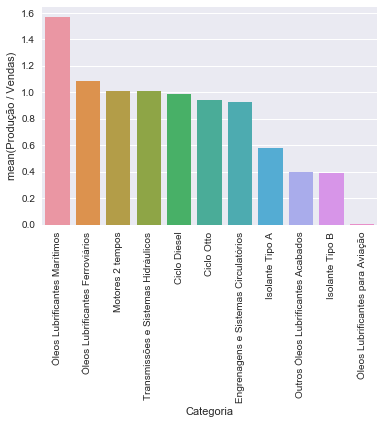

In [45]:
#PLOTAR O GRÁFICO QUE APRESENTA O PERCENTUAL DE VOLUME COMERCIALIZADO PARA CADA CATEGORIA DE OLAC
g = sns.barplot(x='Categoria', y='Produção / Vendas', data=vol_vendas_producao_nacional)
g.set_xticklabels(rotation=90, labels=vol_vendas_producao_nacional['Categoria']);

In [46]:
#EXPORTAR O ARQUIVO
vol_vendas_producao_nacional.to_csv('../data/producao_vs_vendas.csv', encoding='utf-8', sep=',', index=False)

In [47]:
volume_categoria = pd.DataFrame(categoria)
volume_categoria

,Volume-Litros
Descrição do Produto,
Ciclo Diesel,306974521
Ciclo Otto,375935694
ENGRENAGENS E SISTEMAS CIRCULATÓRIOS,48723674
Isolante Tipo A,15366764
Isolante Tipo B,1878221
Motores 2 tempos,12330710
Outros Óleos Lubrificantes Acabados,164282421
TRANSMISSÕES E SISTEMAS HIDRÁULICOS,270903530
Óleos Lubrificantes Ferroviários,13367169


In [48]:
#VOLUMES TOTAIS (L) DE COMERCIALIZAÇÃO POR CATEGORIA DE LUBRIFICANTE
volume_categoria['Volume-Litros'] = volume_categoria['Volume-Litros'].apply(lambda x : float(x/total_vendas*100))

In [49]:
#VOLUMES PERCENTUAIS (L) DE COMERCIALIZAÇÃO POR CATEGORIA DE LUBRIFICANTE
volume_categoria = volume_categoria.sort_values(by='Volume-Litros', ascending=False)
volume_categoria.columns = ['percentual_litros']

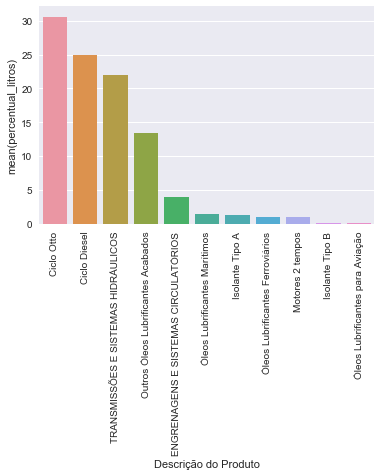

In [50]:
#PLOTAR O GRÁFICO QUE APRESENTA O PERCENTUAL DE VOLUME COMERCIALIZADO PARA CADA CATEGORIA DE OLAC
g = sns.barplot(x=volume_categoria.index, y='percentual_litros', data=volume_categoria)
g.set_xticklabels(rotation=90, labels=volume_categoria.index);

In [51]:
vendas_estado = vendas.copy()
#TROCAR O NOME DA EMPRESA (PRODUTOR-IMPORTADOR) PELO UF ONDE ESTÁ LOCALIZADO A PLANTA DE PRODUÇÃO.
vendas_estado['Produtor-Importador'] = vendas_estado['Produtor-Importador'].map(empresa_prod_uf)

In [52]:
aviacao = vendas_estado[vendas_estado['Descrição do Produto'] == 'Óleos Lubrificantes para Aviação']
aviacao.head()

,Data,Cód Regulado ANP,Produtor-Importador,Código do Produto,Descrição do Produto,Região do Destinatário,UF do Destinatário,Volume-Litros
840,12/2016,33194978,RJ,620201001,Óleos Lubrificantes para Aviação,NORDESTE,BA,208
841,12/2016,33194978,RJ,620201001,Óleos Lubrificantes para Aviação,SUDESTE,RJ,208
1485,12/2016,1033000092,RJ,620201001,Óleos Lubrificantes para Aviação,CENTRO OESTE,GO,145
1486,12/2016,1033000092,RJ,620201001,Óleos Lubrificantes para Aviação,CENTRO OESTE,MS,57
1487,12/2016,1033000092,RJ,620201001,Óleos Lubrificantes para Aviação,CENTRO OESTE,MT,38


In [53]:
#VOLUME COMERCIALIZADO POR EMPRESAS LOCALIZADAS NO RJ
aviacao.groupby('Produtor-Importador').sum()['Volume-Litros']

Produtor-Importador
RJ    575905
Name: Volume-Litros, dtype: int64

In [54]:
#VOLUME COMERCIALIZADO POR EMPRESAS LOCALIZADAS FORA DO RJ
aviacao[aviacao['Produtor-Importador'] != "RJ"]['Volume-Litros'].sum()

695882

In [55]:
#VOLUME TOTAL DE OLEO PARA AVIACAO COMERCIALIZADO
aviacao.groupby('Produtor-Importador').sum()['Volume-Litros'].values[0]+aviacao[aviacao['Produtor-Importador'] != "RJ"]['Volume-Litros'].sum()

1271787

In [56]:
#LISTA DE PRODUTORES LOCALIZADOS NO RJ
plantas_producao[plantas_producao['UF'] == 'RJ']

,CNPJ,Produtor,Município,UF
2,33194978000190,CASTROL BRASIL LTDA,RIO DE JANEIRO,RJ
4,5524572001084,CHEVRON BRASIL LUBRIFICANTES LTDA.,DUQUE DE CAXIAS,RJ
6,33000092003850,COSAN LUBRIFICANTES E ESPECIALIDADES S.A.,RIO DE JANEIRO,RJ
20,974369000103,ICOLUB INDÚSTRIA DE LUBRIFICANTES S.A,RIO DE JANEIRO,RJ
22,77575330000482,INGRAX INDÚSTRIA E COMÉRCIO DE GRAXAS S/A,DUQUE DE CAXIAS,RJ
24,33337122014187,IPIRANGA PRODUTOS DE PETRÓLEO S.A,RIO DE JANEIRO,RJ
25,33337122000127,IPIRANGA PRODUTOS DE PETRÓLEO S.A,RIO DE JANEIRO,RJ
39,3122996000287,MOLECULAR BRASIL LTDA.,RIO DE JANEIRO,RJ
42,34274233026675,PETROBRAS DISTRIBUIDORA S.A.,DUQUE DE CAXIAS,RJ
47,999042000188,QUAKER CHEMICAL INDÚSTRIA E COMÉRCIO S.A,RIO DE JANEIRO,RJ


In [57]:
#EMPRESAS QUE COMERCIALIZAM ÓLEO DE AVIACAO
empresas_aviacao = pd.DataFrame(vendas[vendas['Descrição do Produto'] == "Óleos Lubrificantes para Aviação"].groupby('Produtor-Importador')['Volume-Litros'].sum().sort_values(ascending=False))
empresas_aviacao

,Volume-Litros
Produtor-Importador,
EASTMAN CHEMICAL DO BRASIL LTDA.,515953
SHELL BRASIL PETRÓLEO LTDA.,441699
"AVEX BRASIL COMERCIAL, IMPORTADORA E EXPORTADORA LTDA",168379
COSAN LUBRIFICANTES E ESPECIALIDADES S.A.,125078
X5 COMÉRCIO DE EQUIPAMENTOS E SERVIÇOS AERONÁUTICOS LTDA.,9278
CASTROL BRASIL LTDA,5652
PETROBRAS DISTRIBUIDORA S.A.,3476
CHEMTURA INDUSTRIA QUIMICA DO BRASIL LTDA,1394
KLEBER MARQUES NEVES,760


In [58]:
empresas_aviacao['Volume-Litros'] = empresas_aviacao['Volume-Litros'].apply(lambda x : float(x/aviacao['Volume-Litros'].sum()*100))

In [59]:
empresas_aviacao.columns = ['percentual_litros']
empresas_aviacao

,percentual_litros
Produtor-Importador,
EASTMAN CHEMICAL DO BRASIL LTDA.,40.569136
SHELL BRASIL PETRÓLEO LTDA.,34.730580
"AVEX BRASIL COMERCIAL, IMPORTADORA E EXPORTADORA LTDA",13.239560
COSAN LUBRIFICANTES E ESPECIALIDADES S.A.,9.834823
X5 COMÉRCIO DE EQUIPAMENTOS E SERVIÇOS AERONÁUTICOS LTDA.,0.729525
CASTROL BRASIL LTDA,0.444414
PETROBRAS DISTRIBUIDORA S.A.,0.273316
CHEMTURA INDUSTRIA QUIMICA DO BRASIL LTDA,0.109610
KLEBER MARQUES NEVES,0.059758


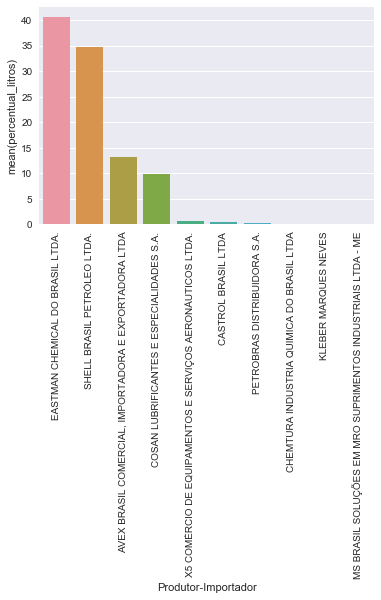

In [60]:
#PLOTAR O GRÁFICO QUE APRESENTA O PERCENTUAL DE VOLUME COMERCIALIZADO PARA CADA CATEGORIA DE OLAC
g = sns.barplot(x=empresas_aviacao.index, y='percentual_litros', data=empresas_aviacao)
g.set_xticklabels(rotation=90, labels=empresas_aviacao.index);

In [61]:
#NÚMERO DE REGISTROS DE DECLARAÇÃO DE COMERCIALIZAÇÃO DE EMPRESAS QUE NÃO PRODUZIRAM EM PLANTA PRÓPRIA NO BRASIL OU SÃO 
#CONSIDERADAS IMPORTADORAS
vendas_estado['Produtor-Importador'].isnull().sum()

9135

In [62]:
#PERCENTUAL DE REGISTROS DE DECLARAÇÃO DE COMERCIALIZAÇÃO QUE SÃO DE EMPRESAS QUE NÃO PRODUZIRAM EM PLANTA PRÓPRIA NO BRASIL OU SÃO 
#CONSIDERADAS IMPORTADORAS
str(round(vendas_estado['Produtor-Importador'].isnull().sum()/vendas_estado['Produtor-Importador'].shape[0]*100,2))+"%"

'24.25%'

In [63]:
#SOMA DOS VOLUMES DE COMERCIALIZACAO DE EMPRESAS DETENTORAS & PRODUTORAS
count_volume_detentor_produtor = 0

#SOMA DOS VOLUMES DE EMPRESAS QUE SÃO DETENTORAS/TERCERIZADORAS OU DETENTORAS/IMPORTADORAS
count_volume_outros = 0
for index,row in vendas_estado.iterrows():
    if type(row['Produtor-Importador']) != str:
        count_volume_outros += row['Volume-Litros']
    else:
        count_volume_detentor_produtor += row['Volume-Litros']

In [64]:
print("Volume total de empresas Detentoras/Produtoras "+str(count_volume_detentor_produtor/1000)+ " m³")
print("Volume total de empresas Detentoras/Tercerizadoras/Importadoras "+str(count_volume_outros/1000)+ " m³")

Volume total de empresas Detentoras/Produtoras 1172674.271 m³
Volume total de empresas Detentoras/Tercerizadoras/Importadoras 57018.112 m³


In [65]:
#PERCENTUAL EM VOLUME DOS REGISTROS QUE NÃO PODE SE INFERIR QUAL A ORIGEM DA PRODUÇÃO, APENAS O DESTINATÁRIO.
str(round(count_volume_outros/(count_volume_outros+count_volume_detentor_produtor)*100,2))+"%"

'4.64%'

In [66]:
#LISTA PARA ABRIGAR O INDEX DOS REGISTROS QUE NÃO POSSUEM A IDENTIFICAÇÃO DA UF DA ORIGEM DA PRODUÇÃO
list_index_nan = []
for index,row in vendas_estado.iterrows():
    if type(row['Produtor-Importador']) != str:
        list_index_nan.append(index)

In [67]:
#DELETAR DO DATAFRAME DOS OS REGISTROS QUE NÃO POSSUEM A IDENTIFICAÇÃO DA UF DA ORIGEM DA PRODUÇÃO
vendas_uf = vendas_estado[vendas_estado['Produtor-Importador'].notnull()]

In [68]:
#RESETAR O INDEX DO DATAFRAME
vendas_uf.reset_index(inplace=True)
del vendas_uf['index']

In [69]:
vendas_uf.columns = ['Data', 'Cód Regulado ANP', 'UF_origem',
       'Código do Produto', 'Descrição do Produto', 'Região do Destinatário',
       'UF_destino', 'Volume-Litros']

In [70]:
#CRIA UMA LISTA COM TODAS AS UF'S
lista_UF = vendas_uf['UF_destino'].unique().tolist()

#ORGANIZA A LISTA POR ORDEM ALFABÉTICA
lista_UF.sort()

In [71]:
#LISTA DE DICIONÁRIOS
lista_dict_uf = []
for uf in lista_UF:
    dict_uf = {"name": uf}
    lista_dict_uf.append(dict_uf)

In [72]:
#CRIA UM DICIONÁRIO PARA CODIFICAR AS UF'S
uf_codigo = {}
count = 0

for uf in lista_UF:
    uf_codigo[uf] = count
    count += 1

In [73]:
#CODIFICA AS COLUNAS UTILIZANDO O DICIONÁRIO uf_codigo
vendas_uf['UF_origem'] = vendas_uf['UF_origem'].map(uf_codigo)
vendas_uf['UF_destino'] = vendas_uf['UF_destino'].map(uf_codigo)

C:\Users\ferraz\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\ferraz\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [74]:
#VERIFICACÃO DA CODIFICACAO
vendas_uf.head()

,Data,Cód Regulado ANP,UF_origem,Código do Produto,Descrição do Produto,Região do Destinatário,UF_destino,Volume-Litros
0,12/2016,200296,17,620101002,ENGRENAGENS E SISTEMAS CIRCULATÓRIOS,SUL,17,9828
1,12/2016,200296,17,620101002,ENGRENAGENS E SISTEMAS CIRCULATÓRIOS,SUL,23,800
2,12/2016,200296,17,620501001,Ciclo Otto,SUL,17,3685
3,12/2016,200296,17,620501001,Ciclo Otto,SUL,22,480
4,12/2016,200296,17,620501001,Ciclo Otto,SUL,23,5040


In [75]:
#CRIAR UMA LISTA DE DICIONÁRIOS PARA RECEBER OS DADOS DE LIGAÇÃO ENTRE OS NÓS
lista_dict_links = []
for index,row in vendas_uf.iterrows():
    dict_links = {"source": row['UF_origem'], "target": row['UF_destino'], "value": row['Volume-Litros']/1000}
    lista_dict_links.append(dict_links)

In [76]:
#CRIAR UM OBJETO PARA CRIAR O DIAGRAMA DE SANKEY
data_vendas_olac = { "nodes" : lista_dict_uf , "links" : lista_dict_links }

In [77]:
data_vendas_olac

{'links': [{'source': 17, 'target': 17, 'value': 9.828},
  {'source': 17, 'target': 23, 'value': 0.8},
  {'source': 17, 'target': 17, 'value': 3.685},
  {'source': 17, 'target': 22, 'value': 0.48},
  {'source': 17, 'target': 23, 'value': 5.04},
  {'source': 17, 'target': 17, 'value': 1.184},
  {'source': 17, 'target': 17, 'value': 17.764},
  {'source': 17, 'target': 22, 'value': 13.8},
  {'source': 17, 'target': 23, 'value': 71.772},
  {'source': 17, 'target': 17, 'value': 30.519},
  {'source': 17, 'target': 23, 'value': 2.2},
  {'source': 25, 'target': 25, 'value': 7.22},
  {'source': 25, 'target': 25, 'value': 117.4},
  {'source': 25, 'target': 8, 'value': 180.0},
  {'source': 25, 'target': 25, 'value': 15.84},
  {'source': 17, 'target': 6, 'value': 29.28},
  {'source': 17, 'target': 8, 'value': 15.72},
  {'source': 17, 'target': 4, 'value': 9.6},
  {'source': 17, 'target': 5, 'value': 4.56},
  {'source': 17, 'target': 9, 'value': 1.92},
  {'source': 17, 'target': 14, 'value': 13.16}

In [78]:
#CRIA UMA LISTA COM A IDENTIFICACAO DOS ESTADOS DE ORIGEM E DE DESTINO
lista_source = []
lista_target = []
for data in data_vendas_olac['links']:
    if data['source'] not in lista_source:
        lista_source.append(data['source'])
    if data['target'] not in lista_target:
        lista_target.append(data['target'])


In [79]:
#CRIA UM DICIONÁRIO ONDE IRÁ RECEBER A INFORMAÇÃO AGREGADA DAS MOVIMENTAÇÕES.
#O OBJETIVO É TER UM REGISTRO ÚNICO DE MOVIMENTAÇÃO (SOMÁTORIO) ENTRE DUAS ENTIDADES
nome_dict = []
for UFcod in lista_source:
    name = UFcod
    nome_dict.append(name)
dict_list_source={ name:{} for name in nome_dict}

In [80]:
#ALIMENTA O DICIONÁRIO COM OS DADOS AGREGADOS
for data in data_vendas_olac['links']:
    for source in dict_list_source:
        if data['source'] == source:
            if data['target'] not in dict_list_source[source]:
                dict_list_source[source][data['target']] = data['value']
            else:
                dict_list_source[source][data['target']] += data['value']   
    

In [81]:
#VISUALIZAR A ESTRUTURA DO DICIONÁRIO CRIADO
dict_list_source

{2: {0: 44.217,
  2: 610.8130000000001,
  13: 4.191999999999999,
  20: 520.4379999999998,
  21: 224.457},
 4: {1: 0.28800000000000003,
  2: 0.36,
  4: 1576.3029999999999,
  5: 231.547,
  7: 0.12,
  8: 0.41600000000000004,
  10: 63.17300000000001,
  11: 1.49,
  13: 0.24,
  14: 1.06,
  16: 307.6219999999999,
  17: 0.292,
  18: 4.8,
  19: 114.89999999999999},
 10: {0: 287.52699999999993,
  1: 857.9479999999998,
  2: 863.4159999999999,
  3: 114.70400000000001,
  4: 5082.051999999998,
  5: 1933.5579999999998,
  6: 2022.5149999999994,
  7: 2755.7530000000006,
  8: 4616.857999999999,
  9: 1987.3970000000002,
  10: 26391.53900000001,
  11: 2829.555,
  12: 5589.155999999997,
  13: 2862.358,
  14: 1178.8119999999997,
  15: 3279.7339999999986,
  16: 970.1560000000002,
  17: 8892.038999999999,
  18: 5355.512,
  19: 1281.716,
  20: 867.8509999999998,
  21: 220.85199999999998,
  22: 6174.731000000001,
  23: 4896.386000000002,
  24: 499.352,
  25: 25148.473999999984,
  26: 816.056},
 12: {8: 1.0,
  1

In [82]:
#IMPRESSÃO DOS DADOS AGREGADOS
for key,values in dict_list_source.items():
    for val in values.items():
        print('source: '+str(key)+" => "+"target: "+str(val[0])+" => "+"value: "+str(val[1]))

source: 17 => target: 0 => value: 0.696
source: 17 => target: 1 => value: 11.672
source: 17 => target: 2 => value: 154.988
source: 17 => target: 3 => value: 89.464
source: 17 => target: 4 => value: 486.8859999999997
source: 17 => target: 5 => value: 317.768
source: 17 => target: 6 => value: 248.12499999999994
source: 17 => target: 7 => value: 107.10800000000006
source: 17 => target: 8 => value: 327.08000000000004
source: 17 => target: 9 => value: 313.16
source: 17 => target: 10 => value: 423.598
source: 17 => target: 11 => value: 213.166
source: 17 => target: 12 => value: 568.844
source: 17 => target: 13 => value: 180.298
source: 17 => target: 14 => value: 181.69200000000004
source: 17 => target: 15 => value: 439.73800000000006
source: 17 => target: 16 => value: 103.90800000000003
source: 17 => target: 17 => value: 3511.0610000000006
source: 17 => target: 18 => value: 192.024
source: 17 => target: 19 => value: 245.18800000000002
source: 17 => target: 20 => value: 373.134
source: 17 => 

In [83]:
#CRIAR UMA LISTA DE DICIONÁRIOS PARA RECEBER OS DADOS AGREGADOS DE LIGAÇÃO ENTRE OS NÓS
lista_dict_agg = []
for key,values in dict_list_source.items():
    for val in values.items():
        dict_links = {"source": key, "target": val[0], "value": round(val[1],3)}
        lista_dict_agg.append(dict_links)

In [84]:
lista_dict_agg

[{'source': 17, 'target': 0, 'value': 0.696},
 {'source': 17, 'target': 1, 'value': 11.672},
 {'source': 17, 'target': 2, 'value': 154.988},
 {'source': 17, 'target': 3, 'value': 89.464},
 {'source': 17, 'target': 4, 'value': 486.886},
 {'source': 17, 'target': 5, 'value': 317.768},
 {'source': 17, 'target': 6, 'value': 248.125},
 {'source': 17, 'target': 7, 'value': 107.108},
 {'source': 17, 'target': 8, 'value': 327.08},
 {'source': 17, 'target': 9, 'value': 313.16},
 {'source': 17, 'target': 10, 'value': 423.598},
 {'source': 17, 'target': 11, 'value': 213.166},
 {'source': 17, 'target': 12, 'value': 568.844},
 {'source': 17, 'target': 13, 'value': 180.298},
 {'source': 17, 'target': 14, 'value': 181.692},
 {'source': 17, 'target': 15, 'value': 439.738},
 {'source': 17, 'target': 16, 'value': 103.908},
 {'source': 17, 'target': 17, 'value': 3511.061},
 {'source': 17, 'target': 18, 'value': 192.024},
 {'source': 17, 'target': 19, 'value': 245.188},
 {'source': 17, 'target': 20, 'valu

In [85]:
#CRIAR UM OBJETO PARA CRIAR O DIAGRAMA DE SANKEY COM DADOS AGREGADOS
vendas_olac_agg = { "nodes" : lista_dict_uf , "links" : lista_dict_agg }

In [86]:
vendas_olac_agg 

{'links': [{'source': 17, 'target': 0, 'value': 0.696},
  {'source': 17, 'target': 1, 'value': 11.672},
  {'source': 17, 'target': 2, 'value': 154.988},
  {'source': 17, 'target': 3, 'value': 89.464},
  {'source': 17, 'target': 4, 'value': 486.886},
  {'source': 17, 'target': 5, 'value': 317.768},
  {'source': 17, 'target': 6, 'value': 248.125},
  {'source': 17, 'target': 7, 'value': 107.108},
  {'source': 17, 'target': 8, 'value': 327.08},
  {'source': 17, 'target': 9, 'value': 313.16},
  {'source': 17, 'target': 10, 'value': 423.598},
  {'source': 17, 'target': 11, 'value': 213.166},
  {'source': 17, 'target': 12, 'value': 568.844},
  {'source': 17, 'target': 13, 'value': 180.298},
  {'source': 17, 'target': 14, 'value': 181.692},
  {'source': 17, 'target': 15, 'value': 439.738},
  {'source': 17, 'target': 16, 'value': 103.908},
  {'source': 17, 'target': 17, 'value': 3511.061},
  {'source': 17, 'target': 18, 'value': 192.024},
  {'source': 17, 'target': 19, 'value': 245.188},
  {'so

In [87]:
with open('../data/vendas_olac_uf.json', 'w') as fp:
    json.dump(data_vendas_olac, fp)

In [88]:
with open('../data/vendas_olac_agg.json', 'w') as fp:
    json.dump(vendas_olac_agg, fp)